Connected to Python 3.11.11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range of eigenvalues
lambda_vals = np.linspace(0.01, 3, 500)

# Define the three functions
f1 = (lambda_vals - 1)**2
f2 = np.log(lambda_vals)**2
f3 = np.log(0.5 * (lambda_vals + 1)) - 0.5 * np.log(lambda_vals)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, f1, label=r'$f_1 = (\lambda - 1)^2$')
plt.plot(lambda_vals, f2, label=r'$f_2 = \log^2(\lambda)$')
plt.plot(lambda_vals, f3, label=r'$f_3 = \log\left(\frac{\lambda + 1}{2\sqrt{\lambda}}\right)$')

plt.axvline(1, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(r'$\lambda$ (Eigenvalue)')
plt.ylabel('Penalty')
plt.title('Comparison of Eigenvalue Penalty Functions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range of eigenvalues
lambda_vals = np.linspace(0.01, 2, 500)

# Define the three functions
f1 = (lambda_vals - 1)**2
f2 = np.log(lambda_vals)**2
f3 = np.log(0.5 * (lambda_vals + 1)) - 0.5 * np.log(lambda_vals)
f4 = (lambda_vals - 1/lambda_vals)**2

def normalize(vals):
    _median = np.median(vals)
    _min = np.min(vals)
    return (vals - _min) / (_median - _min)
# Plot
plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, normalize(f1), label=r'$f_1 = (\lambda - 1)^2$')
plt.plot(lambda_vals, normalize(f2), label=r'$f_2 = \log^2(\lambda)$')
plt.plot(lambda_vals, normalize(f3), label=r'$f_3 = \log\left(\frac{\lambda + 1}{2\sqrt{\lambda}}\right)$')
plt.plot(lambda_vals, normalize(f4), label=r'$f_4 = \left(\lambda - \frac{1}{\lambda}\right)^2$')
plt.ylim(0, np.min([np.max(normalize(f1)), np.max(normalize(f2)), np.max(normalize(f3)), np.max(normalize(f4))]) * 1.1)
plt.axvline(1, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(r'$\lambda$ (Eigenvalue)')
plt.ylabel('Penalty')
plt.title('Comparison of Eigenvalue Penalty Functions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
np.min([np.max(normalize(f1)), np.max(normalize(f2)), np.max(normalize(f3)), np.max(normalize(f4))])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
# --- Option 1: Plotting each surface in a single color on separate axes ---
fig = plt.figure(figsize=(3.5, 4.5))
# fig.suptitle('Visual Comparison of Functions', fontsize=16)

# Define the grid with 2 rows and 2 columns
gs = fig.add_gridspec(2, 2)

# Create the top row plots
ax1 = fig.add_subplot(gs[0, 0], projection='3d') # Top-left subplot for AMV
ax2 = fig.add_subplot(gs[0, 1], projection='3d') # Top-right subplot for AIRM

# Create the bottom-center plot, spanning both columns
ax3 = fig.add_subplot(gs[1, 1], projection='3d') # Bottom subplot for JBLD


# fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# fig.suptitle('Visual Comparison of Three Functions (Single Color)', fontsize=16)

# Create a meshgrid for lambda_1 and lambda_2
# lambda_1_vals = np.linspace(1, 3, 100)
# lambda_2_vals = lambda_1_vals.copy()
delta = 0.65
lambda_1_vals = np.linspace(1-delta, 1+delta, 100)
lambda_2_vals = lambda_1_vals.copy()
L1, L2 = np.meshgrid(lambda_1_vals, lambda_2_vals)

# Define the functions
f1 = (L1 - 1)**2 + (L2 - 1)**2
f2 = np.log(L1)**2 + np.log(L2)**2
f3 = (np.log(0.5 * (L1 + 1)) - 0.5 * np.log(L1)) + (np.log(0.5 * (L2 + 1)) - 0.5 * np.log(L2))

elev = 30  # Elevation angle
azim = 20 # Azimuth angle

q_color = 12
labelsize = 6
cmap_amv = plt.cm.get_cmap('Reds_r', q_color)
cmap_airm = plt.cm.get_cmap('Greens_r', q_color)
cmap_jbld = plt.cm.get_cmap('Blues_r', q_color)
fontsize_xylabel = 8
fontsize_zlabel = 10
# ax1 = axes[0]
ax1.plot_surface(L1, L2, f1, cmap=cmap_amv)
# ax1.set_title('$f_1$ (AMV Distance)')
ax1.set_xlabel('$\\lambda_1$',fontsize=fontsize_xylabel)
ax1.set_ylabel('$\\lambda_2$',fontsize=fontsize_xylabel)
ax1.set_zlabel(r'$\mathcal{D}_{\text{AMV}}^2$', fontsize = fontsize_zlabel)
ax1.tick_params(axis='both', which='major', labelsize=labelsize)
ax1.view_init(elev=elev, azim=azim)


# ax2 = axes[1]
ax2.plot_surface(L1, L2, f2, cmap=cmap_airm)
# ax2.set_title('$f_2$ (AIRM Distance)')
ax2.set_xlabel('$\\lambda_1$',fontsize=fontsize_xylabel)
ax2.set_ylabel('$\\lambda_2$',fontsize=fontsize_xylabel)
ax2.set_zlabel(r'$\mathcal{D}_{\text{AIRM}}^2$',fontsize=fontsize_zlabel)
ax2.tick_params(axis='both', which='major', labelsize=labelsize)
ax2.view_init(elev=elev, azim=azim)

# ax3 = axes[2]
ax3.plot_surface(L1, L2, f3, cmap=cmap_jbld)
# ax3.set_title('$f_3$ (JBLD)')
ax3.set_xlabel('$\\lambda_1$',fontsize=fontsize_xylabel)
ax3.set_ylabel('$\\lambda_2$',fontsize=fontsize_xylabel)
ax3.set_zlabel(r'$\mathcal{D}_{\text{JBLD}}^2$',fontsize=fontsize_zlabel)
ax3.tick_params(axis='both', which='major', labelsize=labelsize)
ax3.view_init(elev=elev, azim=azim)

# plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# plt.savefig('single_color_surfaces.png')
fig.savefig('distance_surfaces.png', dpi=300)
plt.show()

# --- Option 2: Plotting all three surfaces on the same axis ---
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('All Three Surfaces on a Single Axis', fontsize=16)

# # Plot each surface with a label for the legend
# ax.plot_surface(L1, L2, f1, color='lightblue', label='$f_1$ (AMV Distance)', alpha=0.8)
# ax.plot_surface(L1, L2, f2, color='salmon', label='$f_2$ (AIRM Distance)', alpha=0.8)
# ax.plot_surface(L1, L2, f3, color='lightgreen', label='$f_3$ (JBLD)', alpha=0.8)

# ax.set_xlabel('$\\lambda_1$')
# ax.set_ylabel('$\\lambda_2$')
# ax.set_zlabel(r'\mathcal{D}^2')

# # Create a proxy artist for the legend, since plot_surface does not support labels directly
# from matplotlib.lines import Line2D
# legend_elements = [
#     Line2D([0], [0], color='lightblue', lw=4, label='$f_1$ (AMV Distance)'),
#     Line2D([0], [0], color='salmon', lw=4, label='$f_2$ (AIRM Distance)'),
#     Line2D([0], [0], color='lightgreen', lw=4, label='$f_3$ (JBLD)')
# ]
# ax.legend(handles=legend_elements, loc='upper left')

# plt.tight_layout()
# plt.savefig('all_surfaces_on_same_axis.png')
# plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

delta = 0.65
lambda_vals = np.linspace(1-delta, 1+delta, 100)
M = 12


f_AMV = lambda eigvals: np.sum((eigvals - 1)**2)
f_AIRM = lambda eigvals: np.sum(np.log(eigvals)**2)
f_JBLD = lambda eigvals: np.sum((np.log(0.5 * (eigvals + 1)) - 0.5 * np.log(eigvals)))


NUM_TRIALS = 1000
vals_AMV = np.zeros(shape=(NUM_TRIALS,1))
vals_AIRM = np.zeros(shape=(NUM_TRIALS,1))
vals_JBLD = np.zeros(shape=(NUM_TRIALS,1))
for i_trial in range(NUM_TRIALS):
    eigvals = np.random.uniform(1-delta, 1+delta, M)
    vals_AMV[i_trial] = f_AMV(eigvals)
    vals_AIRM[i_trial] = f_AIRM(eigvals)
    vals_JBLD[i_trial] = f_JBLD(eigvals)    


vals_AMV

array([[0.7744999 ],
       [1.32439399],
       [1.93723087],
       [2.37605315],
       [2.14716614],
       [1.43053531],
       [1.61124676],
       [1.83271527],
       [2.24746883],
       [2.52758245],
       [2.16816901],
       [2.08375542],
       [1.40358979],
       [1.27630495],
       [2.61128912],
       [1.90883748],
       [2.05058008],
       [1.69761914],
       [1.17128007],
       [2.14859248],
       [1.23732088],
       [1.19089355],
       [1.40268896],
       [1.42547331],
       [1.40071326],
       [1.38601832],
       [2.12959882],
       [1.16063954],
       [1.4611962 ],
       [1.85525545],
       [1.7942234 ],
       [1.29217997],
       [2.1975812 ],
       [1.36565435],
       [1.63858594],
       [1.39409759],
       [0.79189327],
       [0.91683955],
       [0.93598433],
       [1.47496703],
       [1.64424871],
       [1.22275479],
       [2.01092855],
       [1.60116074],
       [1.85764955],
       [1.27941594],
       [1.69074404],
       [1.690

In [ ]:
# create a figure with scatter of AIRM vs AMV and JBLD
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(vals_AIRM, vals_AMV, alpha=0.5, label='AMV vs AIRM',color='red')
ax.scatter(vals_AIRM, vals_JBLD, alpha=0.5, label='JBLD vs AIRM', color='green')
ax.set_title('Scatter of AMV and JBLD vs AIRM')
ax.set_xlabel('AIRM')
ax.set_ylabel('AMV or JBLD')
ax.legend()
plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1843.93it/s]


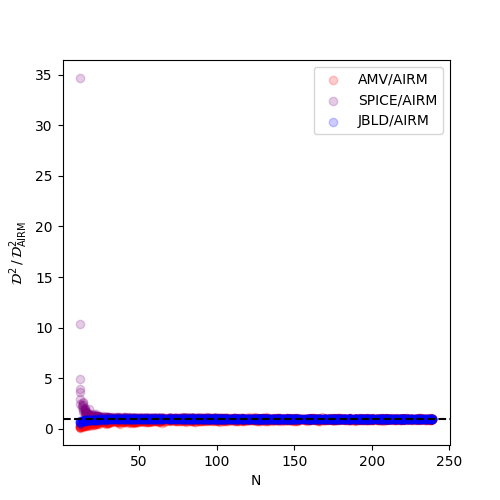

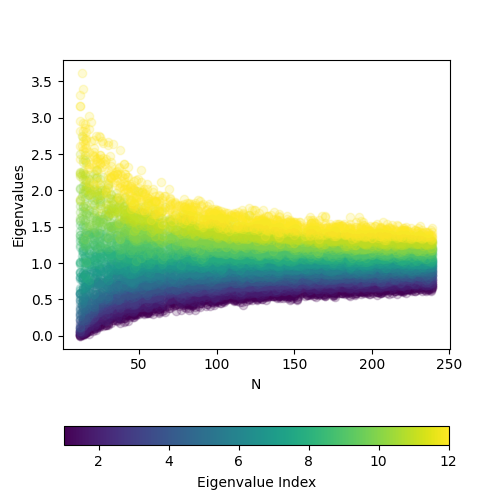

In [5]:
import os
from tqdm import tqdm
os.chdir('/home/or.cohen/thesis_code/RiemannianDOA_proj')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

from utils import *

plt.close('all')

f_AMV = lambda eigvals: np.sum((eigvals - 1)**2)
f_SPICE = lambda eigvals: np.sum((np.sqrt(eigvals) - 1/np.sqrt(eigvals))**2)
f_AIRM = lambda eigvals: np.sum(np.log(eigvals)**2)
f_JBLD = lambda eigvals: np.sum((np.log(0.5 * (eigvals + 1)) - 0.5 * np.log(eigvals)))
def normalize_vals(vals):
    q_high = np.percentile(vals, 5)
    q_low = np.percentile(vals, 0)
    # q_high = np.max(vals)
    # q_low = 0#np.min(vals)
    return (vals - q_low) / (q_high - q_low)

def create_param_vals(dtype, val_low, val_high, val_res, num_trials_overall):
    
    vals = np.arange(val_low, val_high, val_res)
    num_repeat = num_trials_overall // vals.size
    vals = np.repeat(vals, num_repeat, axis=0)
    # If there are any remaining trials, add them to the end
    remaining_trials = num_trials_overall - vals.size
    if remaining_trials > 0:
        vals = np.concatenate([vals, vals[:remaining_trials]])
    vals = vals.astype(dtype)
    return vals

config = create_config(
                m=12, snr=0, N=300, 
                power_doa_db=np.array([0,0]),
                doa=np.array([30 ,40]),
                cohr_flag=True,
                cohr_coeff=0.0,
                impulse_prob=0.0,
                impulse_factor=1.0
                )
power_doa = 10.0 ** (config["power_doa_db"] / 10.0)
A_true = get_steering_matrix(config["doa"], config["m"])
noise_power_db = np.max(config["power_doa_db"]) - config["snr"]
noise_power = 10.0 ** (noise_power_db / 10.0)
R = A_true @ np.diag(power_doa) @ A_true.conj().T + noise_power * np.eye(config["m"])

NUM_TRIALS = 1_000
np.random.seed(0)
list_tuples = [
    ("N", np.random.randint(config["m"], config["m"]*20, size=(NUM_TRIALS,1))),
    # ("N", create_param_vals(np.int, config["m"]*1, config["m"]*30,config["m"]/3, NUM_TRIALS)),
    # ("power_doa_db", create_param_vals(np.float, -5, 5, 0.01, NUM_TRIALS), np.array([0,0])),
    # ("doa", create_param_vals(np.float, -10, 10, 0.1, NUM_TRIALS), config["doa"]),
    # ("cohr_coeff", create_param_vals(np.float, 0, 1, 0.025, NUM_TRIALS)),
    # ("impulse_factor", create_param_vals(np.float, 1, 2, 0.05, NUM_TRIALS)),
    # ("impulse_prcnt", create_param_vals(np.float, 0, 1, 0.1, NUM_TRIALS)),
               ]
for i_parameter in range(len(list_tuples)):
    base_array = None
    if len(list_tuples[i_parameter]) == 2:
        parameter_name, parameter_vals = list_tuples[i_parameter]
    else:
        parameter_name, parameter_vals, base_array = list_tuples[i_parameter]
    vals_AMV = np.zeros(shape=(NUM_TRIALS,1))
    vals_SPICE = np.zeros(shape=(NUM_TRIALS,1))
    vals_AIRM = np.zeros(shape=(NUM_TRIALS,1))
    vals_JBLD = np.zeros(shape=(NUM_TRIALS,1))
    mat_eigvals = np.zeros(shape=(config["m"], NUM_TRIALS))
    # use tqdm for progress bar
    for i_trial in tqdm(range(NUM_TRIALS)):
        curr_config = config.copy()
        param_val = parameter_vals[i_trial].item()
        if base_array is not None:
            param_val += base_array
        curr_config[parameter_name] = param_val
        A_ = get_steering_matrix(curr_config["doa"], curr_config["m"])
        y_noisy = generate_signal(A_, curr_config["power_doa_db"], curr_config["N"], noise_power, cohr_flag=curr_config["cohr_flag"],
                                cohr_coeff=curr_config["cohr_coeff"], noncircular_coeff=curr_config["noncircular_coeff"],
                                impulse_prob=curr_config["impulse_prob"], impulse_factor=curr_config["impulse_factor"],
                                seed=i_trial)
        R_hat = y_noisy @ y_noisy.conj().T / curr_config["N"]
        eigvals = eigvals_of_Q(R_hat, R)
        # eigvals = eigvals_of_Q(R, R_hat)
        vals_AMV[i_trial] = f_AMV(eigvals)
        vals_SPICE[i_trial] = f_SPICE(eigvals)
        vals_AIRM[i_trial] = f_AIRM(eigvals)
        vals_JBLD[i_trial] = f_JBLD(eigvals)

        mat_eigvals[:, i_trial] = eigvals


    alpha_transp = 0.2
    # fig, ax = plt.subplots(figsize=(5, 5))
    # # vals_AMV = normalize_vals(vals_AMV)
    # # vals_AIRM = normalize_vals(vals_AIRM)
    # # vals_JBLD = normalize_vals(vals_JBLD)
    # ax.scatter(parameter_vals, normalize_vals(vals_AMV), alpha=alpha_transp, label='AMV',color='red')
    # # ax.scatter(parameter_vals, normalize_vals(vals_SPICE), alpha=alpha_transp, label='SPICE',color='purple')
    # ax.scatter(parameter_vals, normalize_vals(vals_AIRM), alpha=alpha_transp, label='AIRM',color='green')
    # ax.scatter(parameter_vals, normalize_vals(vals_JBLD), alpha=alpha_transp, label='JBLD',color='blue')
    # ax.set_xlabel(parameter_name)
    # ax.set_ylabel(r'normalized $\mathcal{D}^2$')
    # ax.legend()
    # plt.show()

    CONST_MUL_JBLD = 8
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.axhline(y=1, color='k', linestyle='--')
    ax.scatter(parameter_vals, vals_AMV/vals_AIRM, alpha=alpha_transp, label='AMV/AIRM',color='red')
    # ax.scatter(parameter_vals, normalize_vals(vals_AMV)/normalize_vals(vals_AIRM), alpha=alpha_transp, label='AMV/AIRM',color='red')
    ax.scatter(parameter_vals, vals_SPICE/vals_AIRM, alpha=alpha_transp, label='SPICE/AIRM',color='purple')
    ax.scatter(parameter_vals, CONST_MUL_JBLD*(vals_JBLD)/vals_AIRM, alpha=alpha_transp, label='JBLD/AIRM',color='blue')
    # ax.scatter(parameter_vals, normalize_vals(CONST_MUL_JBLD*(vals_JBLD))/normalize_vals(vals_AIRM), alpha=alpha_transp, label='JBLD/AIRM',color='blue')
    ax.set_xlabel(parameter_name)
    ax.set_ylabel(r'$\mathcal{D}^2 \,/ \,\mathcal{D}^2_{\text{AIRM}}$')
    # ax.set_xscale('log')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots(figsize=(5, 5))
    # select color for each eigenvalue
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=1, vmax=config["m"])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    for i_eig in range(config["m"]):
        color = sm.to_rgba(i_eig + 1)
        ax.scatter(parameter_vals, mat_eigvals[i_eig, :], color=color, alpha=alpha_transp)
    # cbar = fig.colorbar(sm, ax=ax)
    # cbar.set_label('Eigenvalue Index', rotation=270, labelpad=15)
    cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.05, pad=0.2)
    cbar.set_label('Eigenvalue Index', rotation=0, labelpad=5)
    # ax.set_yscale('log')
    ax.set_xlabel(parameter_name)
    ax.set_ylabel('Eigenvalues')
    plt.show()


8.317766166719343

In [5]:
np.min(vals_AIRM/vals_JBLD)

8.034983475488108